In [1]:
# once i have wholegenome_offset.trees
import pandas as pd
import tskit
import allel
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tsinfer
import pyslim
import os
from collections import defaultdict
import glob

In [5]:
path2 = '/home/tbellagio/simulations/to_transfer/'


from data_for_plots import her_dict, freq_order, sel_dict, poly_dict, freq_dict, optima_dict, freq_dict2, sel_order, optima_order, poly_h2_order, freq_optima_order, poly_order, freq_optima_order2,heritability_order

####

mfitness = pd.read_csv(path2 + 'mfitnes_oct29.csv', index_col=[0])

In [6]:
#to_eliminate = mfitness[['9', '10', '11', '12', '13', '14', '15', '16', '17']].isna().sum(axis=1)[mfitness[['9', '10', '11', '12', '13', '14', '15', '16',
#       '17']].isna().sum(axis=1) !=9].index

#mfitness = mfitness.drop(to_eliminate, axis=0)

#mfitness = mfitness.drop(['9', '10', '11', '12', '13', '14', '15', '16', '17'],axis=1)

In [7]:
#mfitness = mfitness.drop(to_eliminate)

#mfitness = mfitness.drop(['9', '10', '11', '12', '13', '14', '15', '16','17'],axis=1)

In [10]:
mfitness = mfitness.reset_index()

mfitness['index'] = mfitness['index'].str.split('/subp').str[0]

mfitness['optima'] = mfitness['index'].str.split('/').str[-1]

mfitness['sel'] = mfitness['index'].str.split('/').str[-2]

mfitness['h2'] = mfitness['index'].str.split('/').str[-3]

mfitness['freq'] = mfitness['index'].str.split('_').str[-3]

mfitness['poly'] = mfitness['index'].str.split('_').str[-2]

#mfitness['rep'] = mfitness['index'].str.split('_').str[-1].str.split('/').str[0]


In [15]:
## for mean fitness is it is nan is beacuase the pop died so the mean fitness should be 0
mfitness = mfitness.fillna(0)


mfitness= mfitness.replace({'optima-2': 'ex', 'optima-1': 'me', 'optima0': 'int', 'optima1': 'me', 'optima2': 'ex'})

mfitness = mfitness[mfitness['optima'].isin(['ex', 'int', 'me'])]

mfitness_0gen= mfitness[['optima','sel','freq','poly','h2', '0']].copy()

mfitness_0gen = mfitness_0gen.reset_index(drop=True)

mfitness_0gen = mfitness_0gen.rename(columns={1: 'mfitness_1gen'})

In [16]:
#colors
custom_categories = ['lowfreq', 'mediumfreq', 'highfreq']
custom_colors = sns.color_palette("Greens", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(custom_categories, custom_colors))

In [17]:
custom_colors

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [18]:
colors_full = []

for color in custom_colors:
    colors_full.extend([color] * 3)

In [19]:
colors_full

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [20]:
freq_optima_order2

['Common environments Causal loci freq: 50-100%',
 'Common environments Causal loci freq: 5-50%',
 'Common environments Causal loci freq: 0-5%',
 'Intermediate environments Causal loci freq: 50-100%',
 'Intermediate environments Causal loci freq: 5-50%',
 'Intermediate environments Causal loci freq: 0-5%',
 'Extreme environments Causal loci freq: 50-100%',
 'Extreme environments Causal loci freq: 5-50%',
 'Extreme environments Causal loci freq: 0-5%']

In [21]:
poly_order = ['1 Causal locus', '5 Causal loci', '20 Causal loci', '100 Causal loci']

In [22]:
optima_dict

{'int': 'Common environments',
 'me': 'Intermediate environments',
 'ex': 'Extreme environments'}

In [24]:
mfitness_0gen = mfitness_0gen.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict2).replace(optima_dict)

mfitness_0gen = mfitness_0gen.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict2).replace(optima_dict)

In [25]:
mfitness_0gen['freq-optima'] =   mfitness_0gen['optima'] + ' ' +  mfitness_0gen['freq']

In [26]:
mfitness_0gen['freq-optima'].unique()

array(['Extreme environments Causal loci freq: 5-50%',
       'Common environments Causal loci freq: 5-50%',
       'Intermediate environments Causal loci freq: 5-50%',
       'Extreme environments Causal loci freq: 0-5%',
       'Common environments Causal loci freq: 0-5%',
       'Intermediate environments Causal loci freq: 0-5%',
       'Extreme environments Causal loci freq: 50-100%',
       'Common environments Causal loci freq: 50-100%',
       'Intermediate environments Causal loci freq: 50-100%'],
      dtype=object)

In [27]:
mfitness_0gen['poly_h2'] = mfitness_0gen['poly'] + mfitness_0gen['h2']


In [28]:
poly_order

['1 Causal locus', '5 Causal loci', '20 Causal loci', '100 Causal loci']

In [29]:
freq_optima_order2

['Common environments Causal loci freq: 50-100%',
 'Common environments Causal loci freq: 5-50%',
 'Common environments Causal loci freq: 0-5%',
 'Intermediate environments Causal loci freq: 50-100%',
 'Intermediate environments Causal loci freq: 5-50%',
 'Intermediate environments Causal loci freq: 0-5%',
 'Extreme environments Causal loci freq: 50-100%',
 'Extreme environments Causal loci freq: 5-50%',
 'Extreme environments Causal loci freq: 0-5%']

In [30]:
custom_color_dict = dict(zip(freq_optima_order2, colors_full))

In [31]:
freq_optima_order2

['Common environments Causal loci freq: 50-100%',
 'Common environments Causal loci freq: 5-50%',
 'Common environments Causal loci freq: 0-5%',
 'Intermediate environments Causal loci freq: 50-100%',
 'Intermediate environments Causal loci freq: 5-50%',
 'Intermediate environments Causal loci freq: 0-5%',
 'Extreme environments Causal loci freq: 50-100%',
 'Extreme environments Causal loci freq: 5-50%',
 'Extreme environments Causal loci freq: 0-5%']

In [32]:
custom_color_dict

{'Common environments Causal loci freq: 50-100%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Common environments Causal loci freq: 5-50%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Common environments Causal loci freq: 0-5%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Intermediate environments Causal loci freq: 50-100%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Intermediate environments Causal loci freq: 5-50%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Intermediate environments Causal loci freq: 0-5%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Extreme environments Causal loci freq: 50-100%': (0.1340253748558247,
  0.5423298731257208,
  0.26828143021914647),
 'Extreme environments Causal loci freq: 5-50%': (0.1340253748558247,
  0.5423298731257208,
  0.26828143021914647),
 'Extreme environments Causal loci freq: 0-5%': (0.13402537

In [34]:
custom_color_dict

{'Common environments Causal loci freq: 50-100%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Common environments Causal loci freq: 5-50%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Common environments Causal loci freq: 0-5%': (0.7792233756247597,
  0.9132333717800846,
  0.7518031526336024),
 'Intermediate environments Causal loci freq: 50-100%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Intermediate environments Causal loci freq: 5-50%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Intermediate environments Causal loci freq: 0-5%': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'Extreme environments Causal loci freq: 50-100%': (0.1340253748558247,
  0.5423298731257208,
  0.26828143021914647),
 'Extreme environments Causal loci freq: 5-50%': (0.1340253748558247,
  0.5423298731257208,
  0.26828143021914647),
 'Extreme environments Causal loci freq: 0-5%': (0.13402537

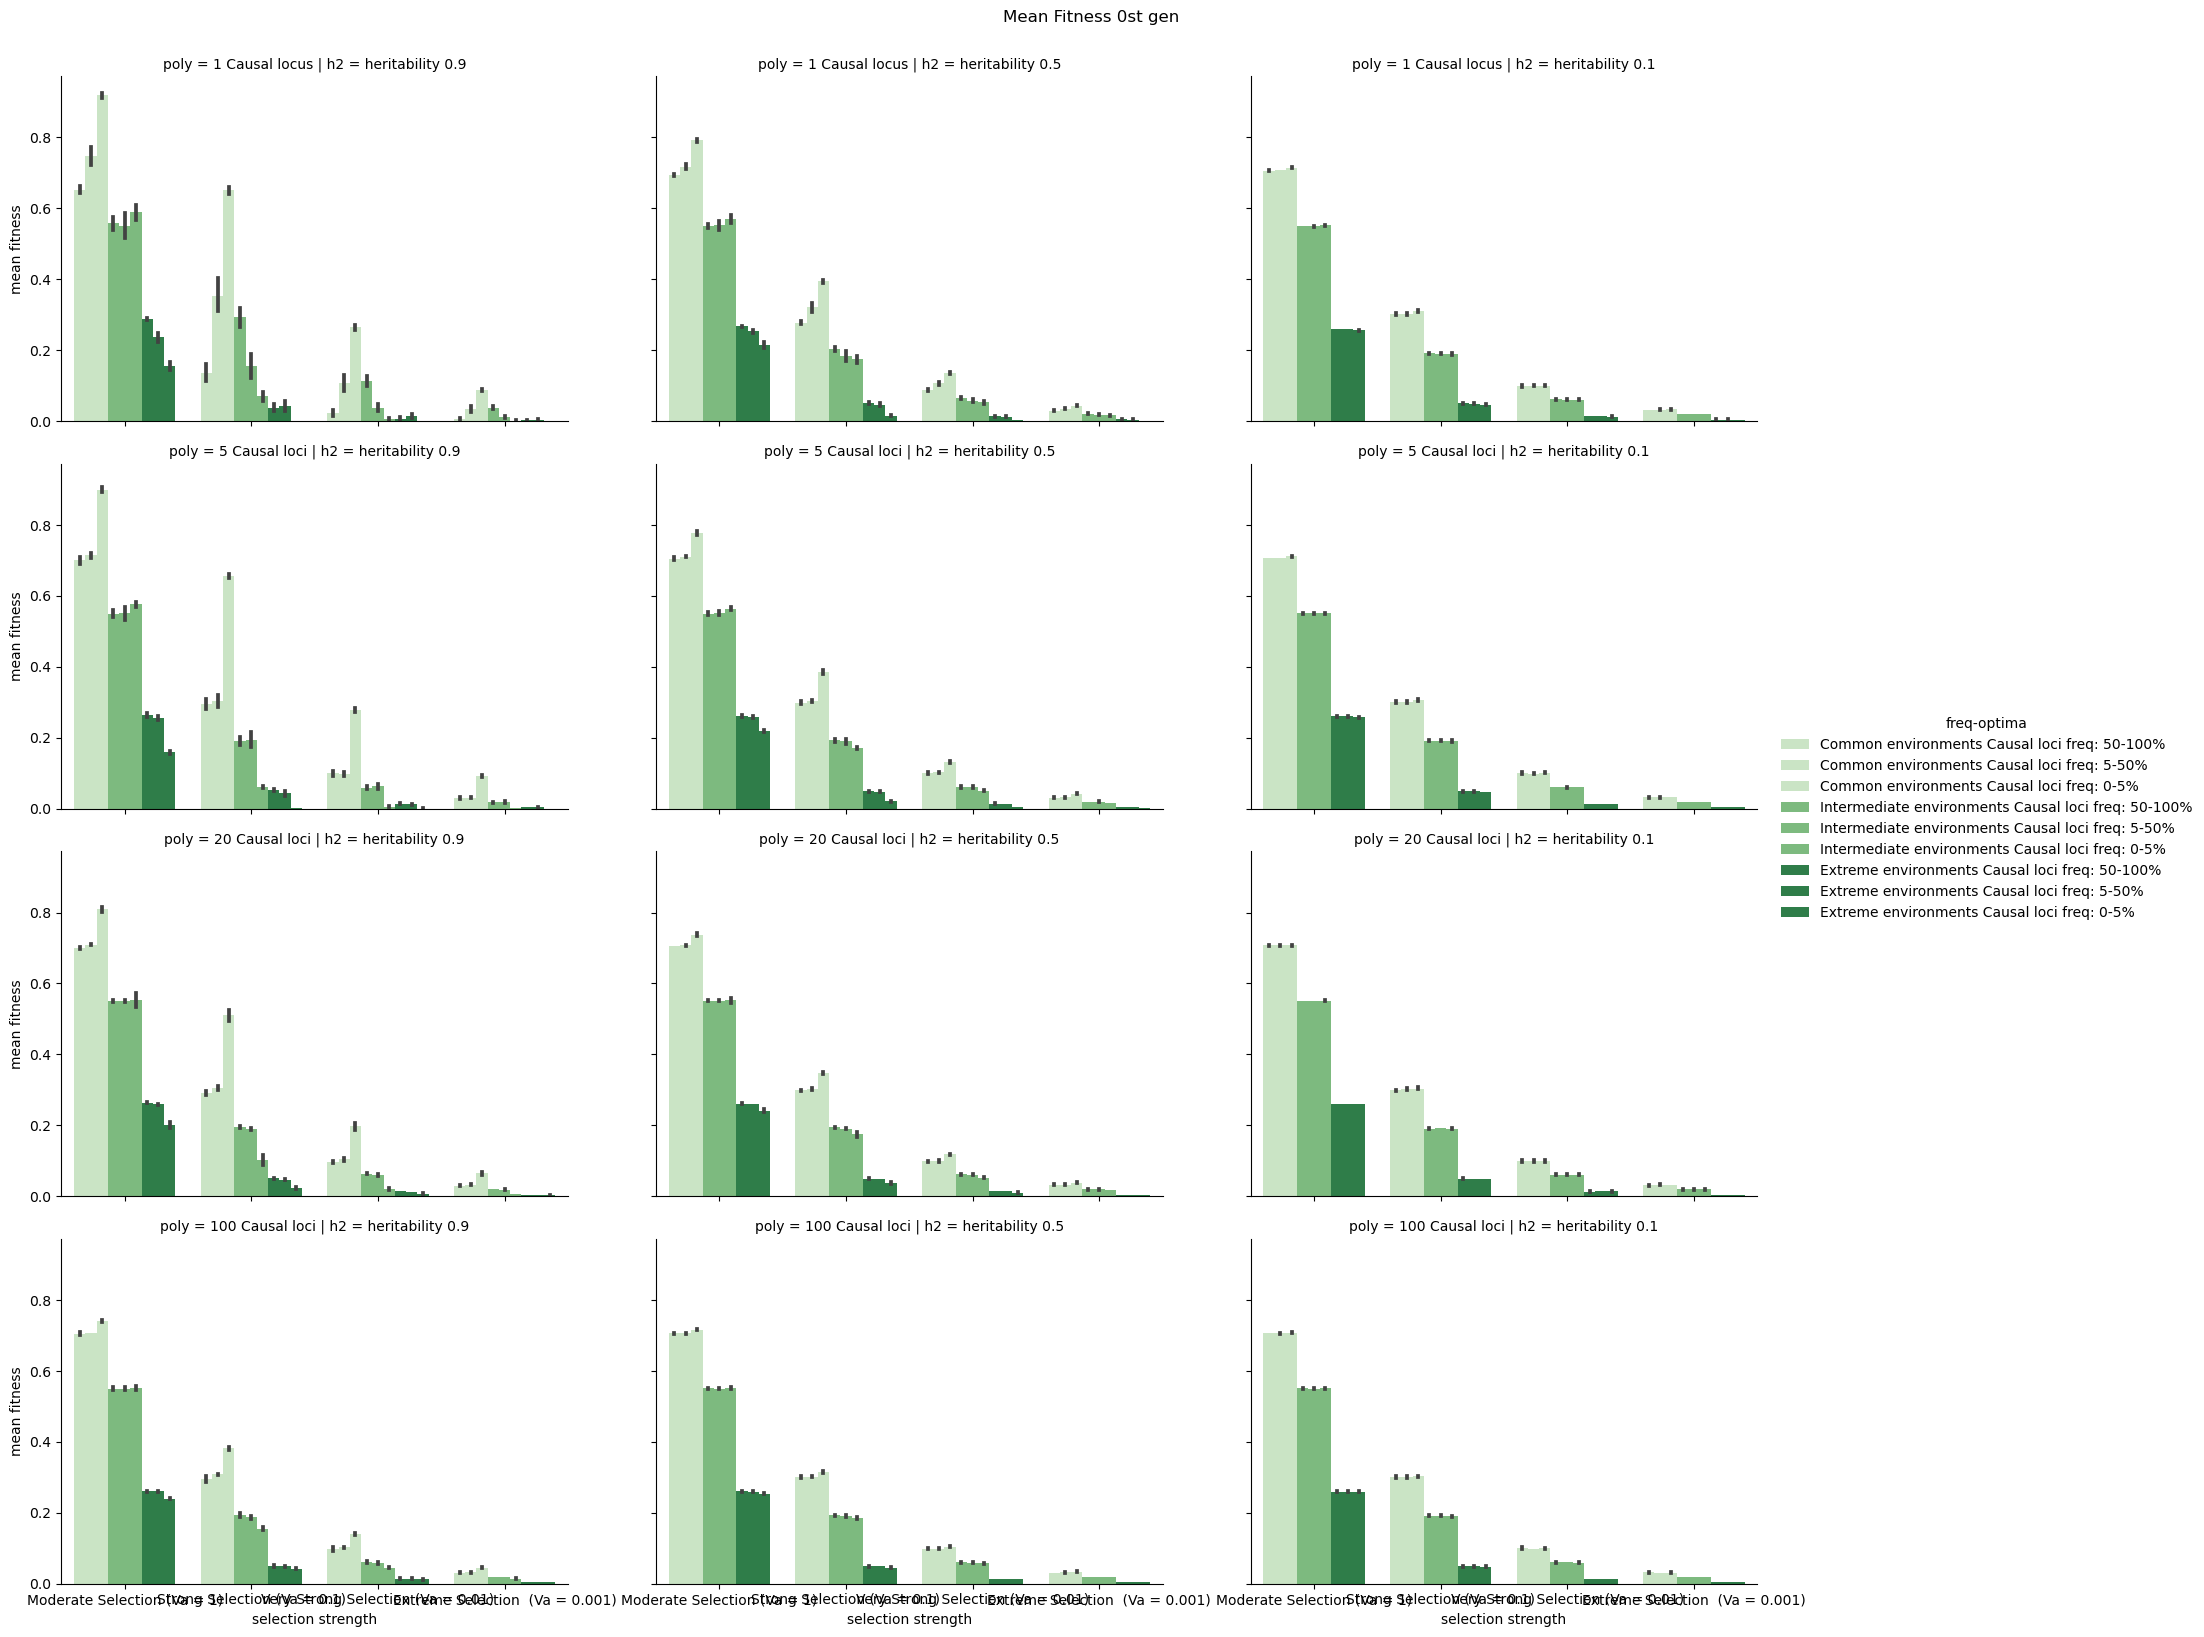

In [37]:
# Create a facet grid with two additional categorical variables
g = sns.catplot(data=mfitness_0gen, x='sel', y='0', hue='freq-optima', col='h2', row='poly',
                row_order=poly_order,
                kind="bar", height=4, aspect=1.5,
                palette=custom_color_dict,
                hue_order=freq_optima_order2,
                order=sel_order
               )
g.fig.suptitle('Mean Fitness 0st gen', y=1.02)
g.set_axis_labels('selection strength', 'mean fitness')
g.savefig("Mean_fitness_gen0.png")
# Show the plot
plt.show()

In [38]:
mfitness

,0,1,2,3,4,5,6,7,8,optima,sel,h2,freq,poly,sel_freq,poly_h2,freq-optima
0,3.438880e-12,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,ex,estrongsel,highh,mediumfreq,monogen,estrongselmediumfreq,monogenhighh,mediumfreq_ex
1,3.081910e-11,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,ex,estrongsel,highh,mediumfreq,monogen,estrongselmediumfreq,monogenhighh,mediumfreq_ex
2,3.335600e-12,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,ex,estrongsel,highh,mediumfreq,monogen,estrongselmediumfreq,monogenhighh,mediumfreq_ex
3,3.059000e-13,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,ex,estrongsel,highh,mediumfreq,monogen,estrongselmediumfreq,monogenhighh,mediumfreq_ex
4,1.164410e-07,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,ex,estrongsel,highh,mediumfreq,monogen,estrongselmediumfreq,monogenhighh,mediumfreq_ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,2.402100e-02,0.020305,0.019403,4.412240e-03,0.0,0.0,0.0,0.0,0.0,me,exstrongsel,lowh,highfreq,onehpoly,exstrongselhighfreq,onehpolylowh,highfreq_me
27652,2.314180e-02,0.024034,0.005773,1.646970e-14,0.0,0.0,0.0,0.0,0.0,me,exstrongsel,lowh,highfreq,onehpoly,exstrongselhighfreq,onehpolylowh,highfreq_me
27653,1.954330e-02,0.014651,0.044239,0.000000e+00,0.0,0.0,0.0,0.0,0.0,me,exstrongsel,lowh,highfreq,onehpoly,exstrongselhighfreq,onehpolylowh,highfreq_me
27654,2.068120e-02,0.025899,0.004940,0.000000e+00,0.0,0.0,0.0,0.0,0.0,me,exstrongsel,lowh,highfreq,onehpoly,exstrongselhighfreq,onehpolylowh,highfreq_me


In [36]:
mfitness = mfitness.drop('index',axis=1)

In [47]:
mfitness = mfitness.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict2).replace(optima_dict)

mfitness = mfitness.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict2).replace(optima_dict)

In [48]:
selected_columns = ['optima','sel','h2','poly','freq','sel_freq','poly_h2','freq-optima']
melted_mfitness = mfitness.melt(selected_columns, var_name='generation', value_name='mean_fitness')

In [49]:
melted_mfitness['mean_fitness'] = melted_mfitness['mean_fitness'].astype(float)

In [51]:
poly_h2_order

['1 Causal locus\nheritability 0.1',
 '1 Causal locus\nheritability 0.5',
 '1 Causal locus\nheritability 0.9',
 '5 Causal loci\nheritability 0.1',
 '5 Causal loci\nheritability 0.5',
 '5 Causal loci\nheritability 0.9',
 '20 Causal loci\nheritability 0.1',
 '20 Causal loci\nheritability 0.5',
 '20 Causal loci\nheritability 0.9',
 '100 Causal loci\nheritability 0.1',
 '100 Causal loci\nheritability 0.5',
 '100 Causal loci\nheritability 0.9']

In [53]:
melted_mfitness['poly_h2'].unique()

array(['1 Causal locus\nheritability 0.9',
       '1 Causal locus\nheritability 0.5',
       '1 Causal locus\nheritability 0.1',
       '100 Causal loci\nheritability 0.9',
       '100 Causal loci\nheritability 0.5',
       '100 Causal loci\nheritability 0.1',
       '5 Causal loci\nheritability 0.9',
       '5 Causal loci\nheritability 0.5',
       '5 Causal loci\nheritability 0.1',
       '20 Causal loci\nheritability 0.9',
       '20 Causal loci\nheritability 0.5',
       '20 Causal loci\nheritability 0.1'], dtype=object)

In [52]:
melted_mfitness['poly_h2'] = melted_mfitness['poly'] + '\n'+  melted_mfitness['h2']

In [79]:
melted_mfitness['optima'].unique()

array(['Extreme environments', 'Common environments',
       'Intermediate environments'], dtype=object)

In [88]:
## lets explore onyl 1 seelction regime
melted_mfitness_vstrongsel_common_env = melted_mfitness[(melted_mfitness['sel'] == 'Very Strong Selection (Va = 0.01)') & (melted_mfitness['optima'] == 'Common environments')] 



In [90]:
melted_mfitness_vstrongsel_common_env['freq'].unique()

array(['Causal loci freq: 5-50%', 'Causal loci freq: 0-5%',
       'Causal loci freq: 50-100%'], dtype=object)

In [97]:
freq_order = [i.replace('\n', ' ') for i in freq_order]

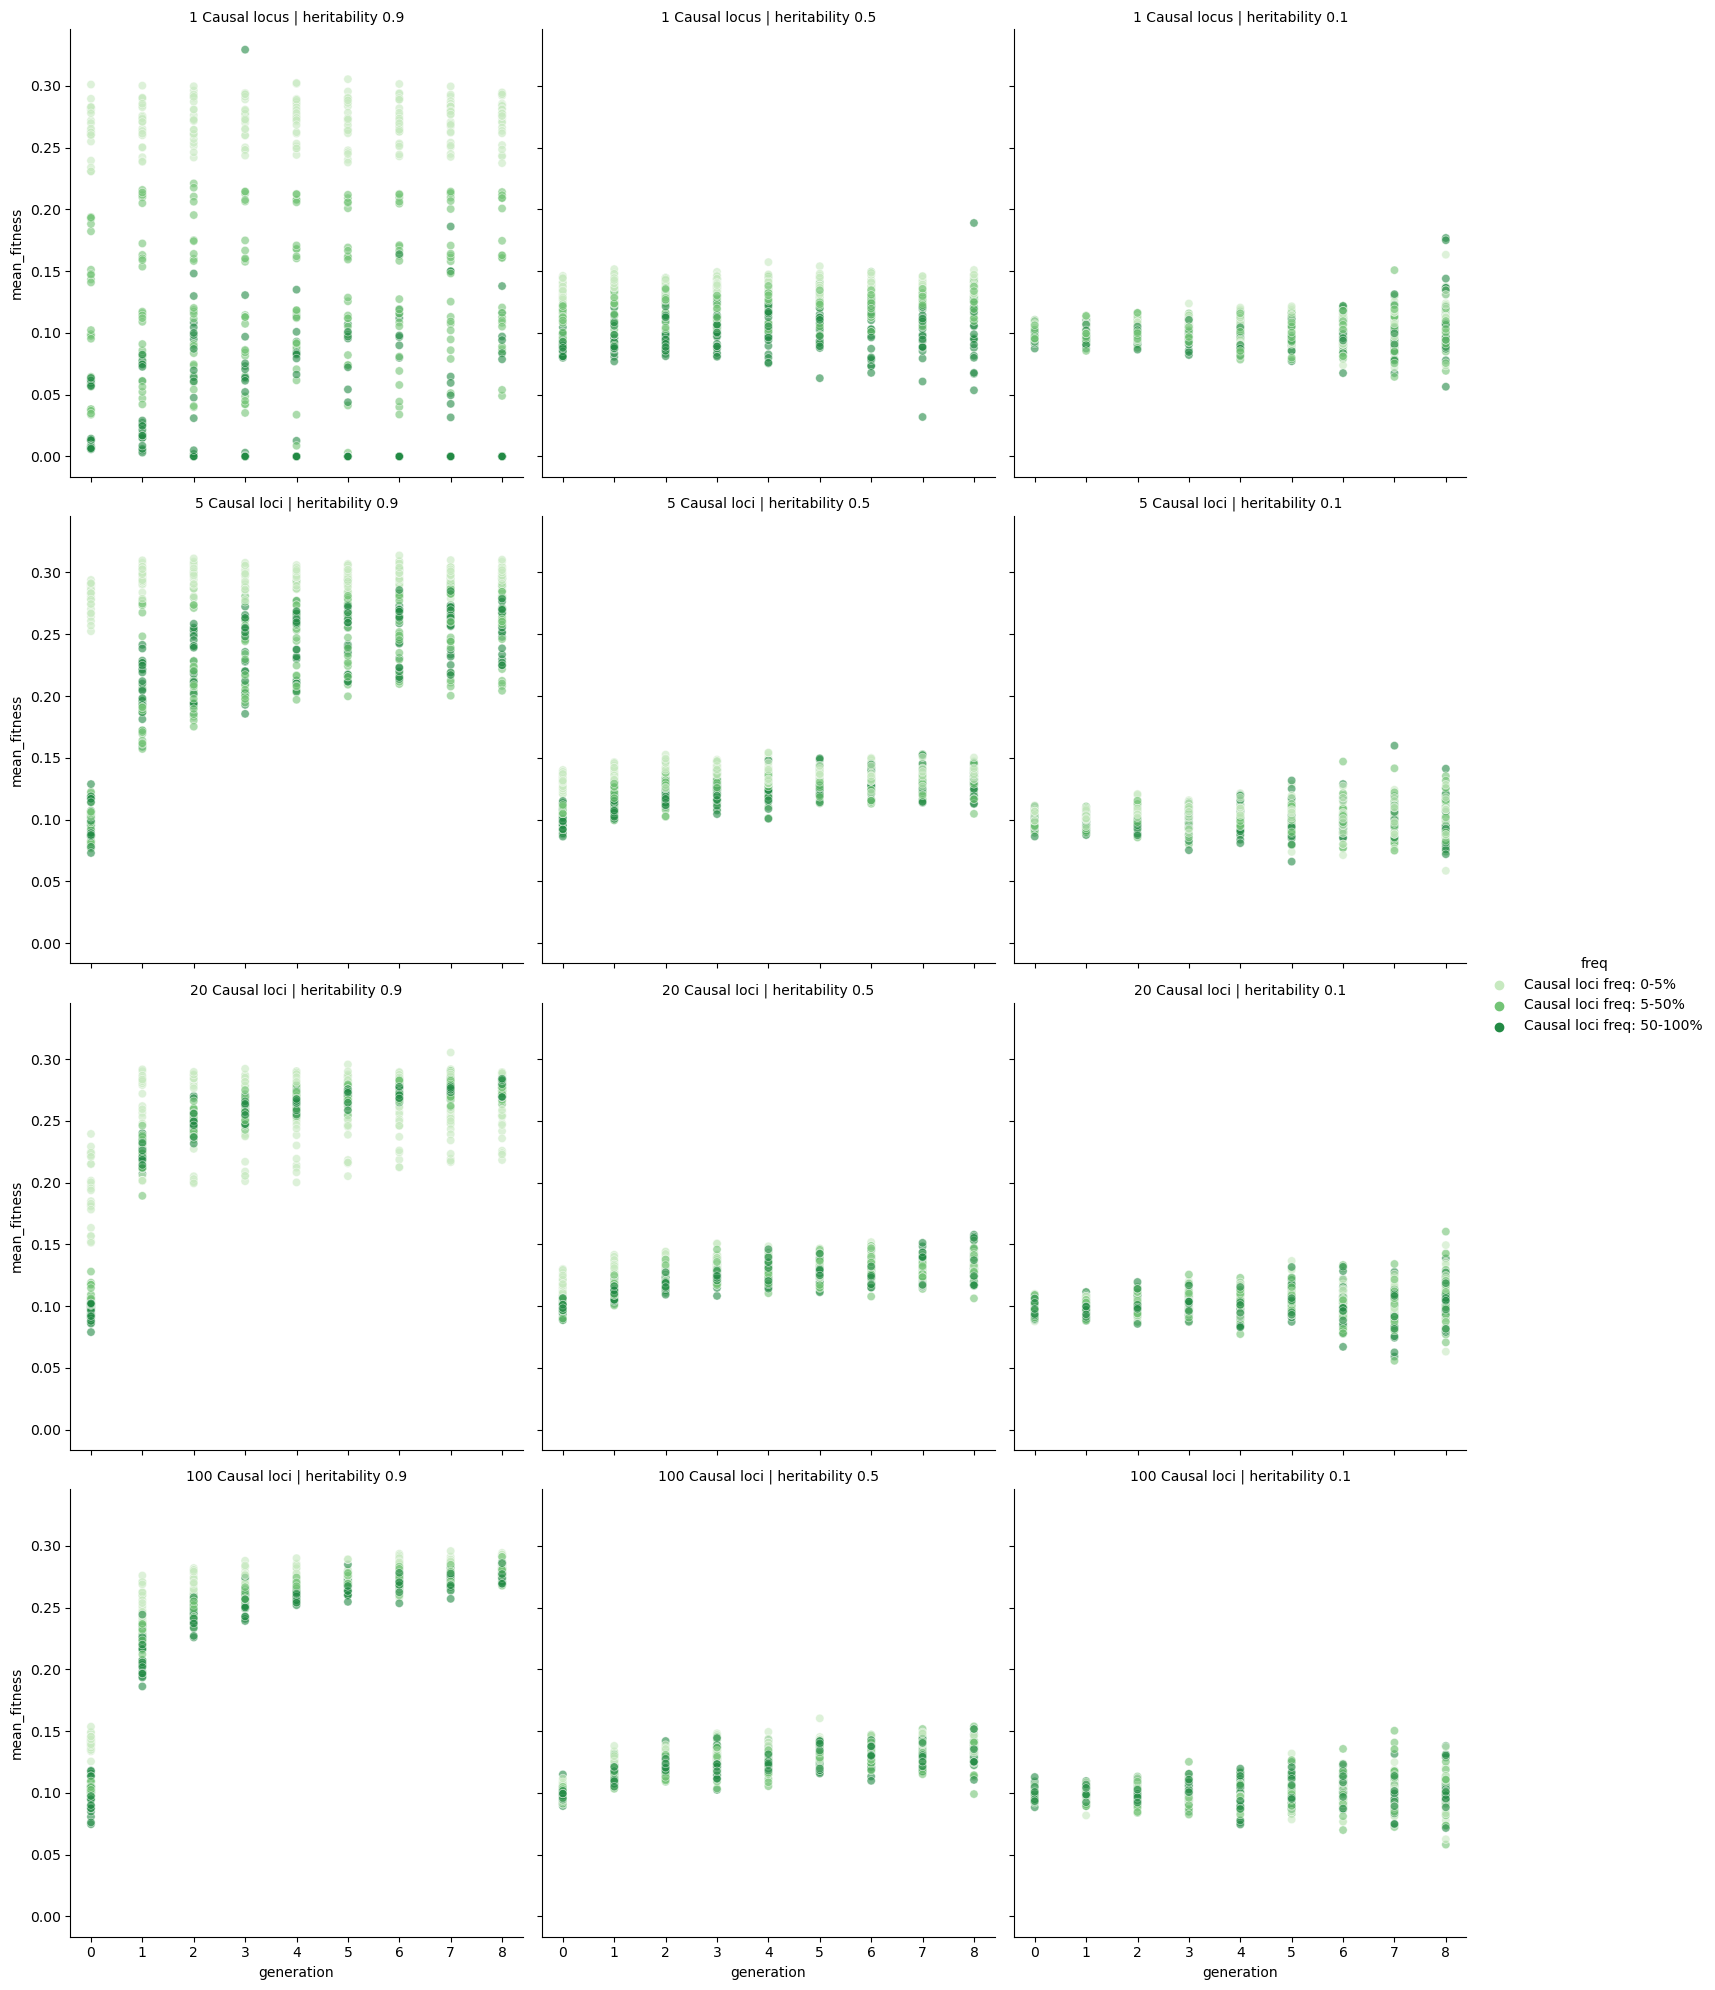

In [103]:

greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(freq_order, greens))

g = sns.relplot(data=melted_mfitness_vstrongsel_common_env, x="generation", y="mean_fitness", hue="freq", col="h2", row="poly",
                alpha=0.6,
                row_order = poly_order,
                palette=custom_color_dict2,
                hue_order=freq_order,
                col_order = heritability_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

g.savefig("vstrongsel_common_env_mean_fitness_over_time.png")
plt.show()


In [106]:
melted_mfitness_vstrongsel_intermediate_env = melted_mfitness[(melted_mfitness['sel'] == 'Very Strong Selection (Va = 0.01)') & (melted_mfitness['optima'] == 'Intermediate environments')] 


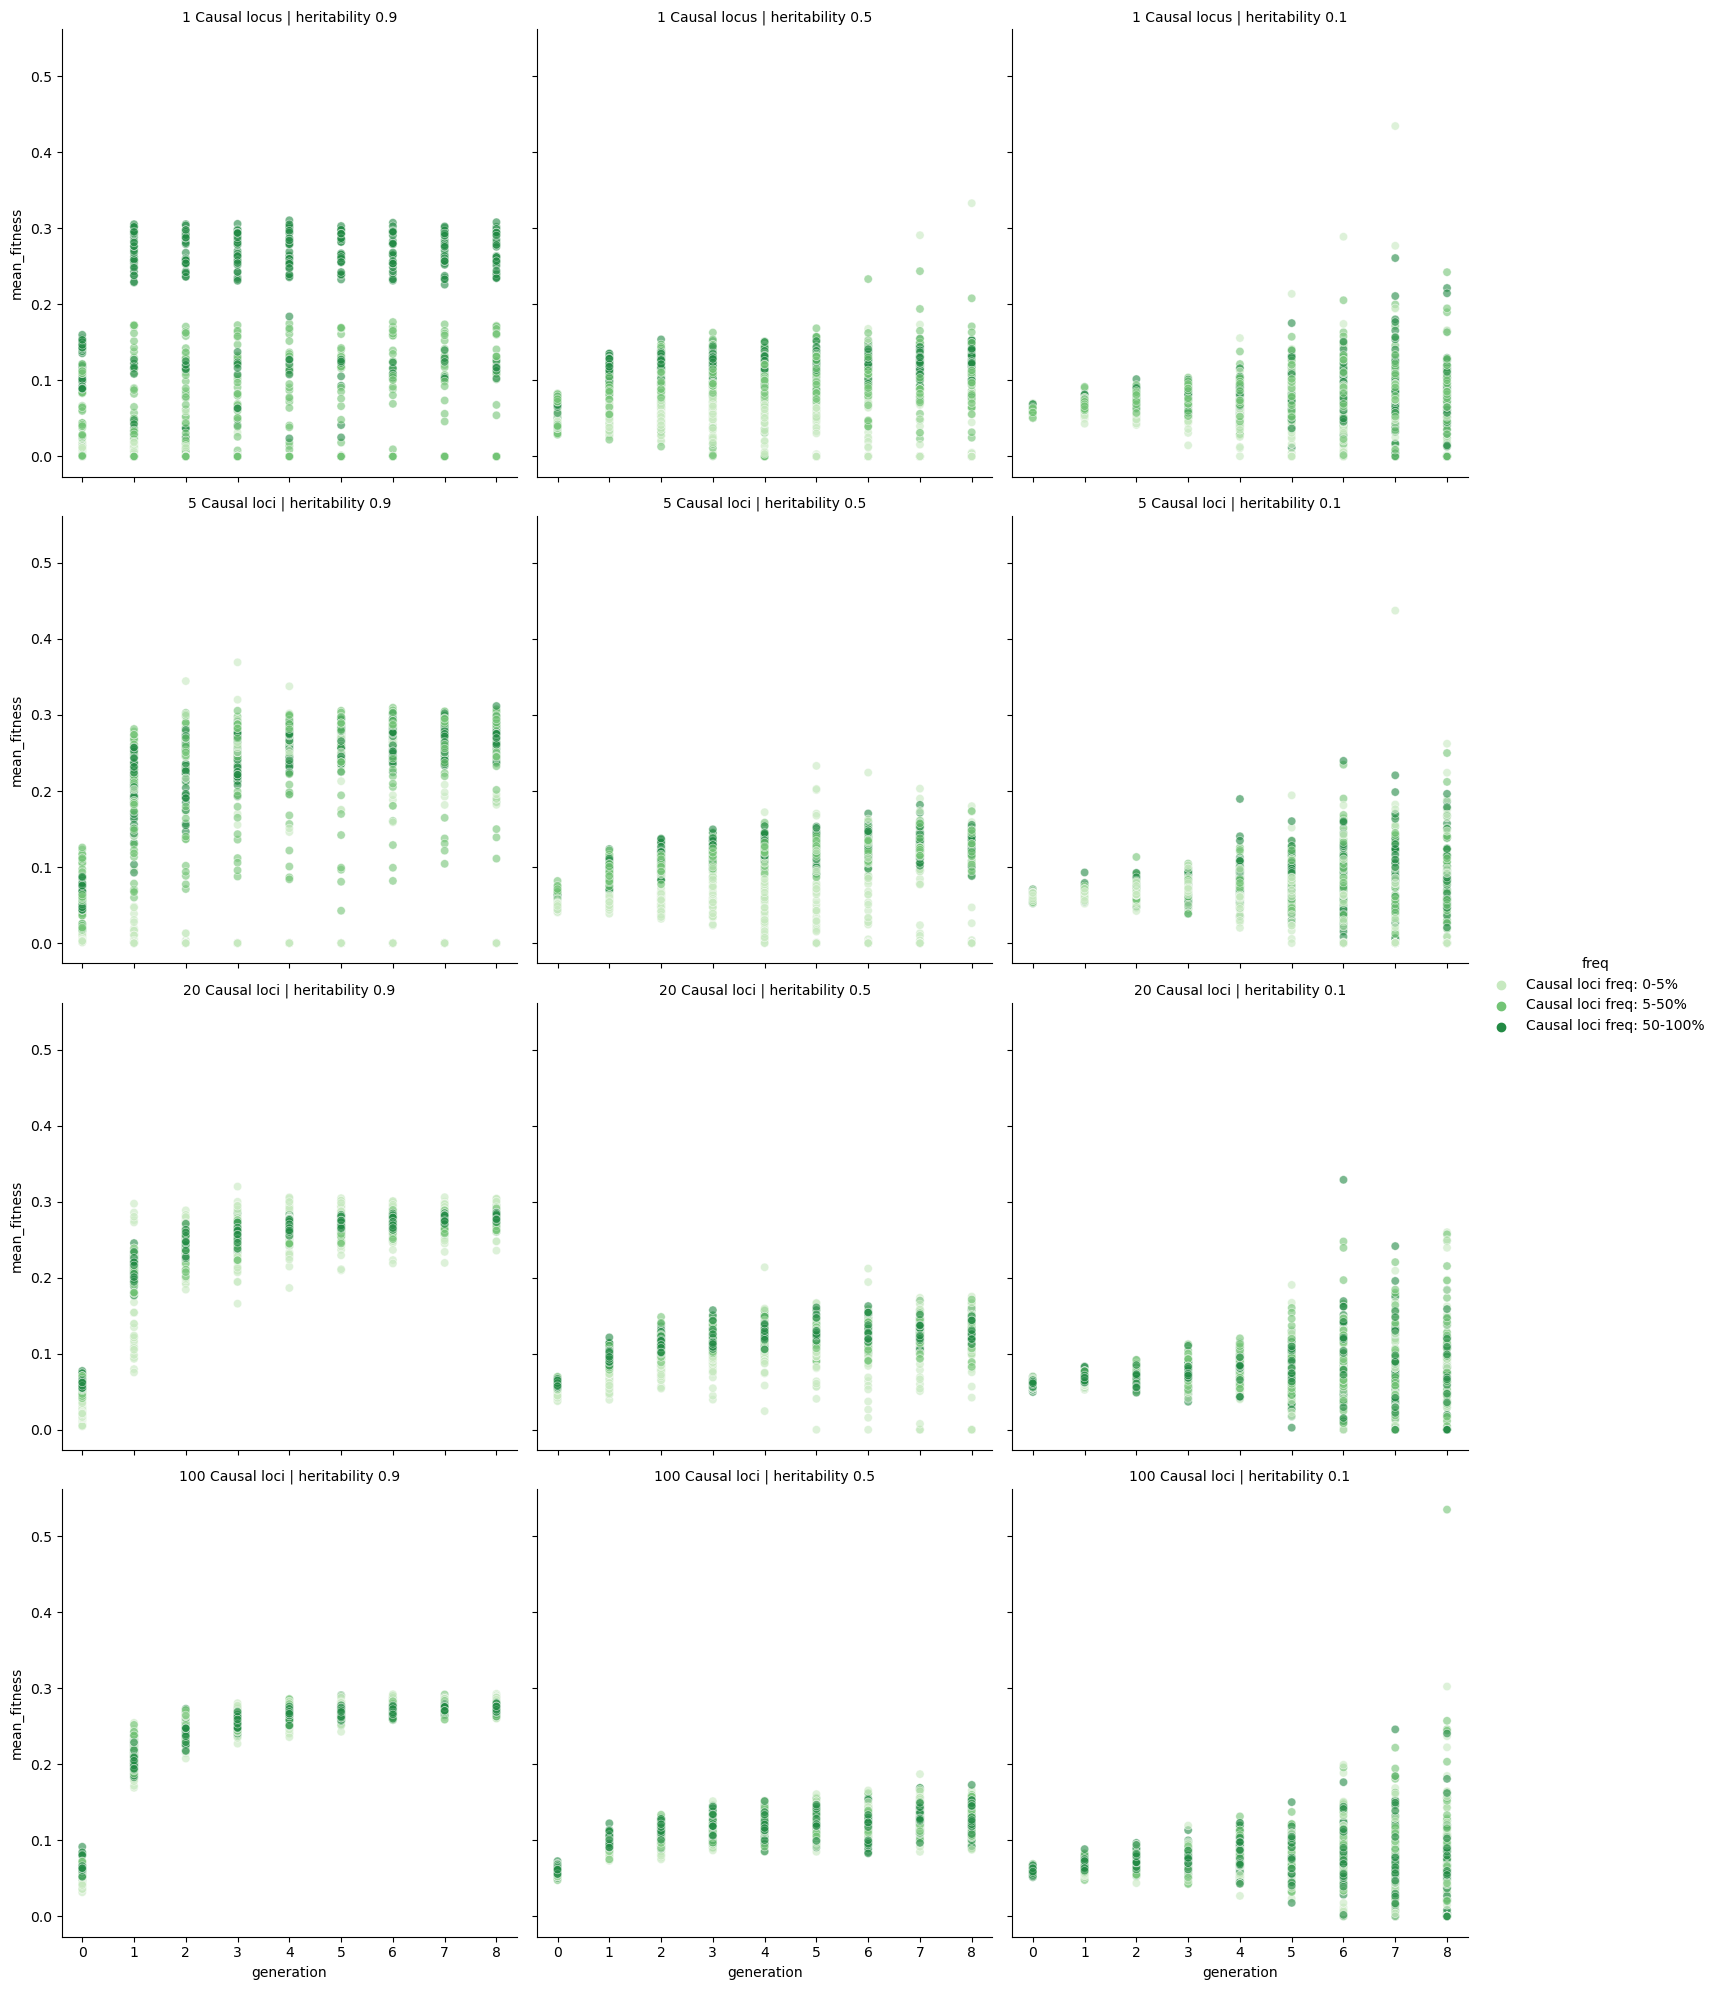

In [107]:
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(freq_order, greens))

g = sns.relplot(data=melted_mfitness_vstrongsel_intermediate_env, x="generation", y="mean_fitness", hue="freq", col="h2", row="poly",
                alpha=0.6,
                row_order = poly_order,
                palette=custom_color_dict2,
                hue_order=freq_order,
                col_order = heritability_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

g.savefig("vstrongsel_intermediate_env_mean_fitness_over_time.png")
plt.show()

In [ ]:
melted_mfitness_vstrongsel_inter_env = melted_mfitness[(melted_mfitness['sel'] == 'Very Strong Selection (Va = 0.01)') & (melted_mfitness['optima'] == 'Intermediate environments')] 


In [86]:
melted_mfitness_vstrongsel_freq_med = melted_mfitness[(melted_mfitness['sel'] == 'Very Strong Selection (Va = 0.01)') & (melted_mfitness['freq'] == 'Causal loci freq: 5-50%') & (melted_mfitness['optima'] == 'Intermediate environments')] 


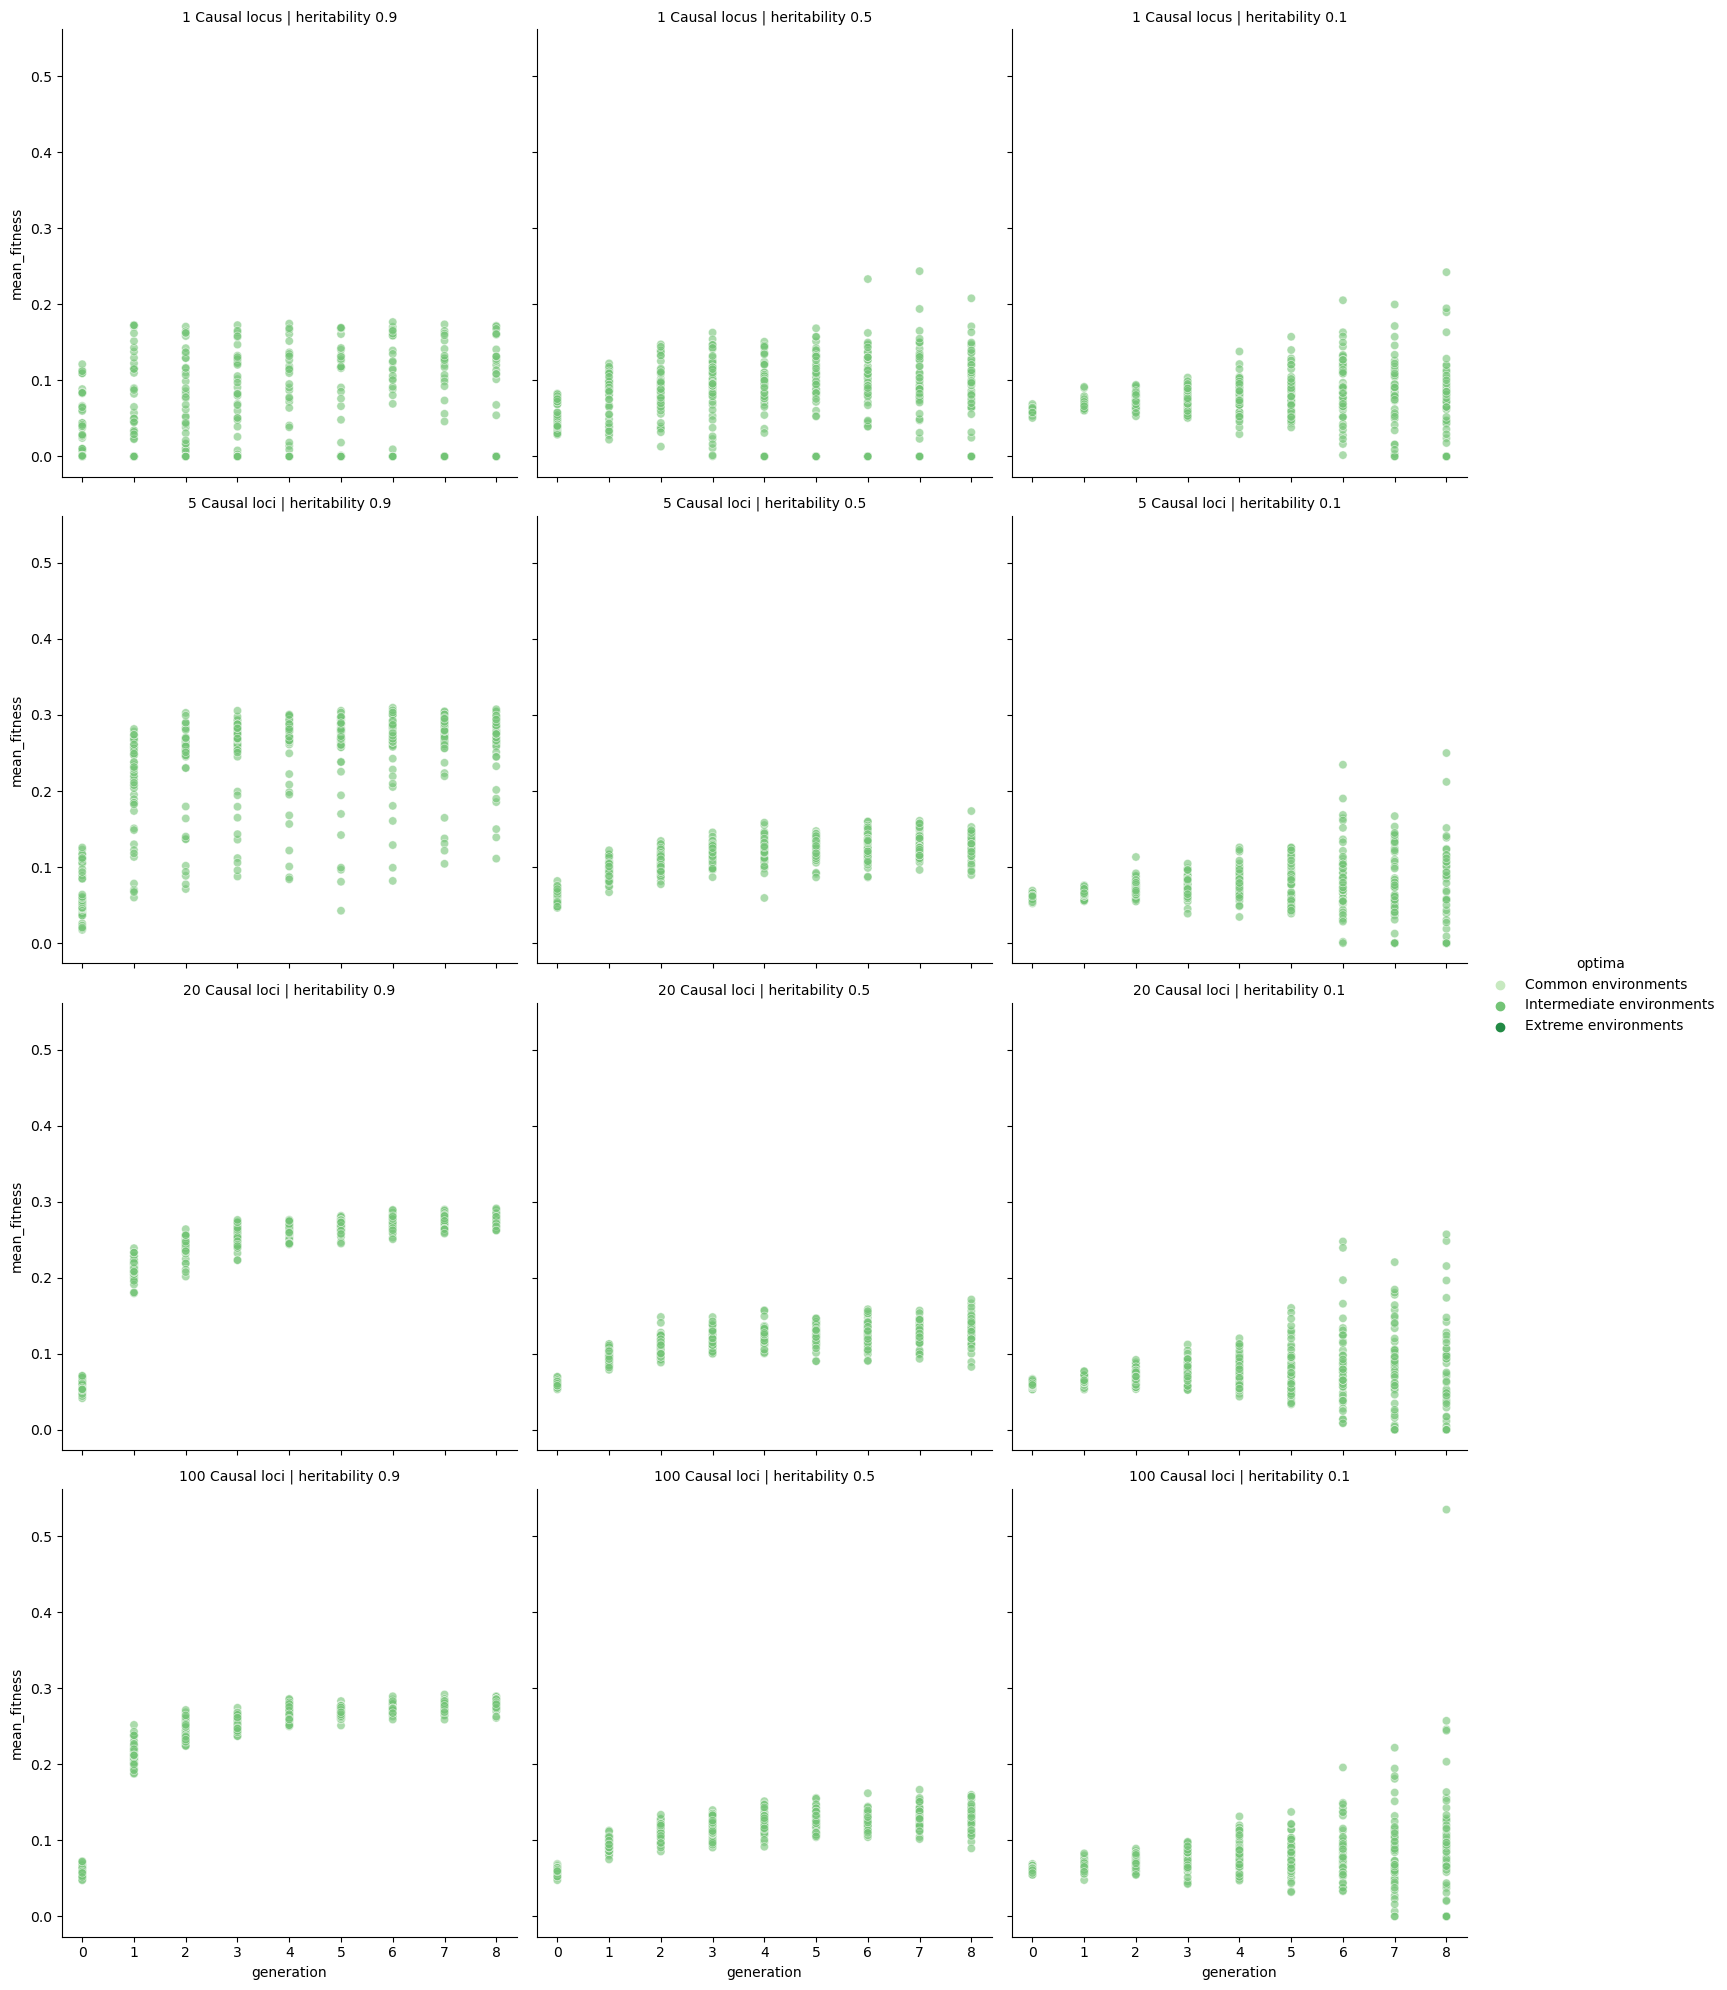

In [87]:
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(optima_order, greens))

g = sns.relplot(data=melted_mfitness_vstrongsel_freq_med, x="generation", y="mean_fitness", hue="optima", col="h2", row="poly",
                alpha=0.6,
                row_order = poly_order,
                palette=custom_color_dict2,
                hue_order=optima_order,
                col_order = heritability_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

#g.savefig("Mean_fitness_time.png")
plt.show()


In [77]:
melted_mfitness_vstrongsel_freq_low = melted_mfitness[(melted_mfitness['sel'] == 'Extreme Selection  (Va = 0.001)') & (melted_mfitness['freq'] == 'Causal loci freq: 0-5%')] 

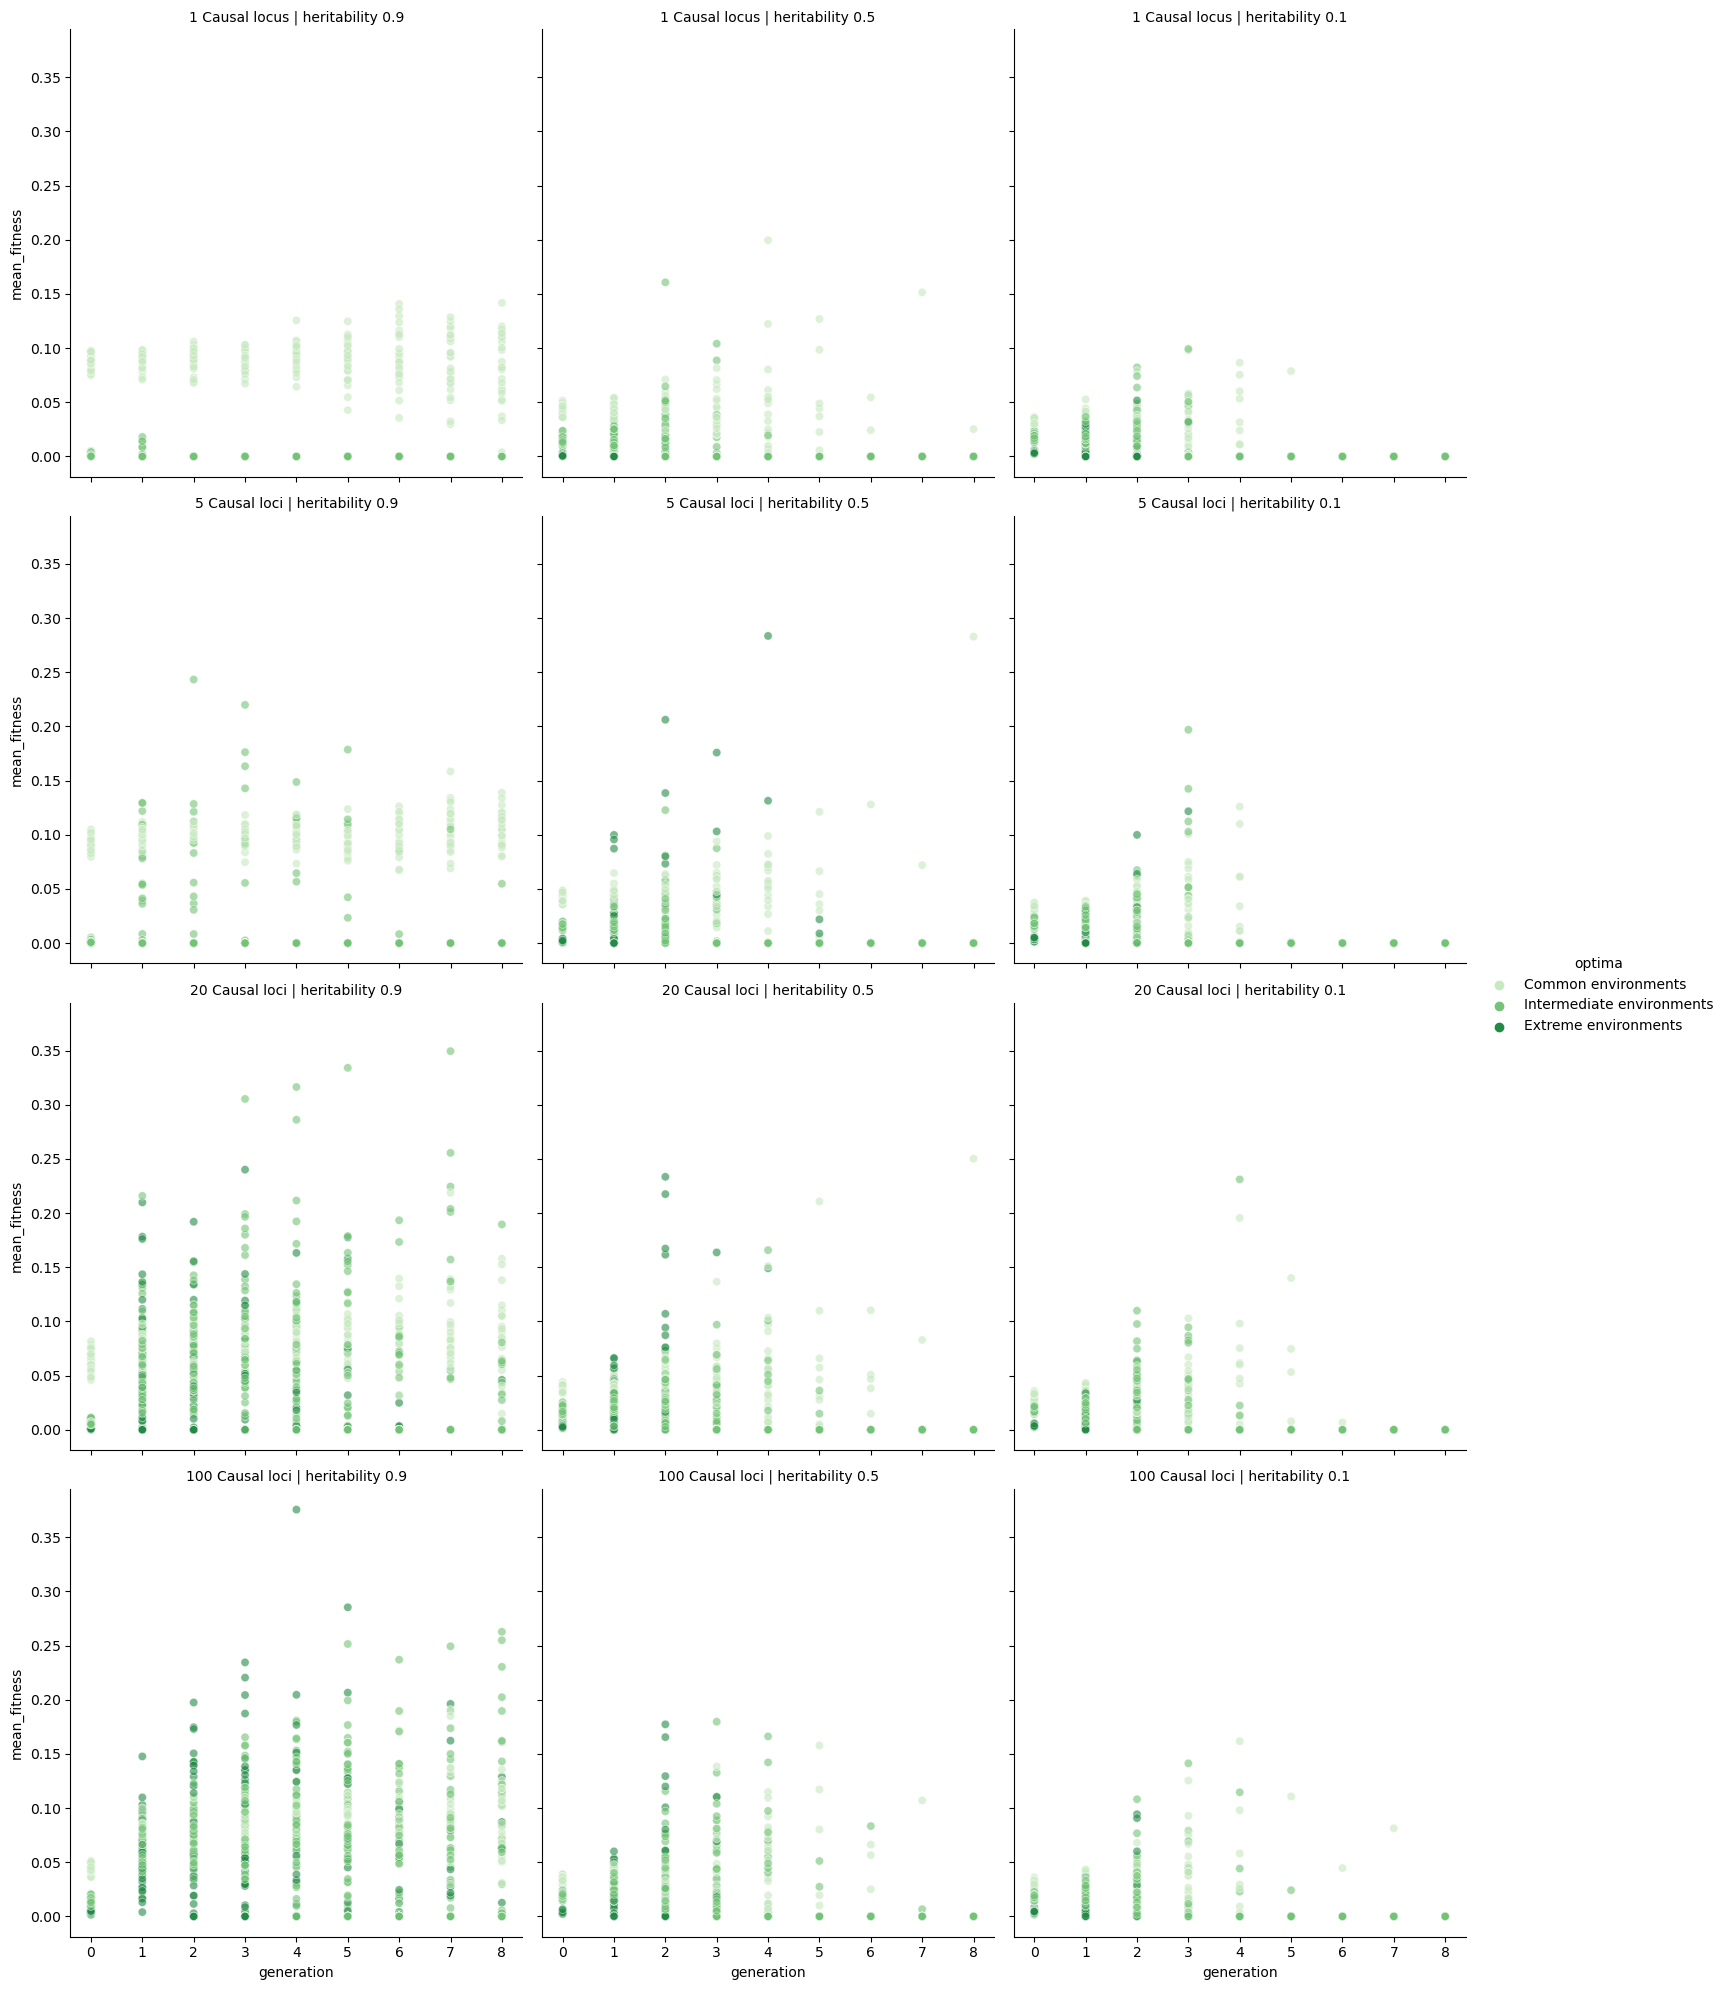

In [78]:

greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(optima_order, greens))

g = sns.relplot(data=melted_mfitness_vstrongsel_freq_low, x="generation", y="mean_fitness", hue="optima", col="h2", row="poly",
                alpha=0.6,
                row_order = poly_order,
                palette=custom_color_dict2,
                hue_order=optima_order,
                col_order = heritability_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

#g.savefig("Mean_fitness_time.png")
plt.show()

In [ ]:
sel_order = ['moderatesel','strongsel', 'vstrongsel', 'estrongsel', 'exstrongsel']

In [39]:
mfitness['sel_freq'].unique()

array(['estrongselmediumfreq', 'vstrongselmediumfreq',
       'strongselmediumfreq', 'moderateselmediumfreq',
       'exstrongselmediumfreq', 'estrongsellowfreq', 'vstrongsellowfreq',
       'strongsellowfreq', 'moderatesellowfreq', 'exstrongsellowfreq',
       'estrongselhighfreq', 'vstrongselhighfreq', 'strongselhighfreq',
       'moderateselhighfreq', 'exstrongselhighfreq'], dtype=object)

In [40]:
order_sel_freq = ['moderatesellowfreq', 'moderateselmediumfreq','moderateselhighfreq', 
       'strongsellowfreq', 'strongselmediumfreq','strongselhighfreq',
        'vstrongsellowfreq', 'vstrongselmediumfreq','vstrongselhighfreq',
         'estrongsellowfreq', 'estrongselmediumfreq','estrongselhighfreq',
                   'exstrongsellowfreq', 'exstrongselmediumfreq','exstrongselhighfreq',]


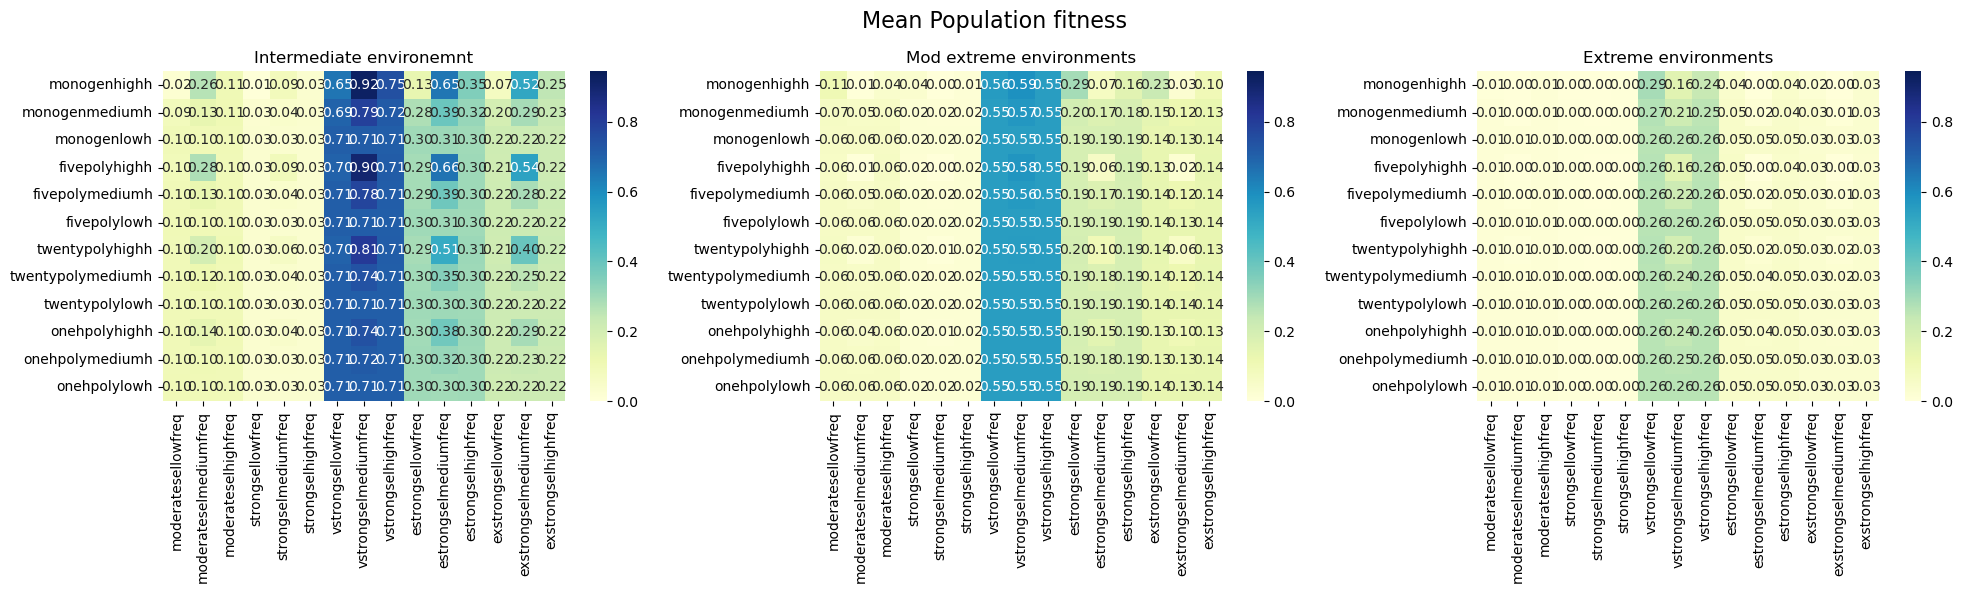

In [41]:
mfitness_0gen= mfitness[['optima','sel','freq','poly','h2', '0', 'sel_freq', 'poly_h2']].copy()

mfitness_0gen = mfitness_0gen.reset_index(drop=True)

global_vmin = mfitness_0gen['0'].values.min()
global_vmax = mfitness_0gen['0'].values.max()

filter1 = mfitness_0gen[mfitness_0gen['optima'] == 'int']
filter2 = mfitness_0gen[mfitness_0gen['optima'] == 'me']
filter3 = mfitness_0gen[mfitness_0gen['optima'] == 'ex']

# Create a 1x3 grid of subplots for heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot each heatmap from the filtered DataFrames in its respective subplot
filter1 = filter1.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter1.columns = order_sel_freq
filter1 = filter1.loc[poly_h2_order]
sns.heatmap(filter1,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[0], vmin=global_vmin, vmax=global_vmax)

axes[0].set_title('Intermediate environemnt')
axes[0].set_ylabel('')

filter2 = filter2.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter2 = filter2.loc[poly_h2_order]
filter2.columns = order_sel_freq
sns.heatmap(filter2,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[1], vmin=global_vmin, vmax=global_vmax)
axes[1].set_title('Mod extreme environments')
axes[1].set_ylabel('')

filter3 = filter3.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter3 = filter3.loc[poly_h2_order]

filter3.columns = order_sel_freq
sns.heatmap(filter3,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[2], vmin=global_vmin, vmax=global_vmax)
axes[2].set_title('Extreme environments')
axes[2].set_ylabel('')

fig.suptitle('Mean Population fitness', fontsize=16)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
def order_lists(ordered_list, other_list):
    # Create a new list to store the ordered items
    ordered = []
    
    for item in ordered_list:
            if item in other_list:
                ordered.append(item)
                other_list.remove(item)  # Remove the item from the original list
    
    return ordered

In [43]:
def create_pivot_rearrage(filter_df, col_num):
    filter_df.loc[:,col_num] = filter_df[col_num].astype(float)
    filter_df = filter_df.pivot_table(index='poly_h2', columns=['sel_freq'], values=col_num)
    ordered_columns = order_lists(order_sel_freq,filter_df.columns.tolist())
    filter_df.columns = ordered_columns
    ordered_rows = order_lists(poly_h2_order,filter_df.index.tolist())
    filter_df = filter_df.loc[ordered_rows]
    return filter_df

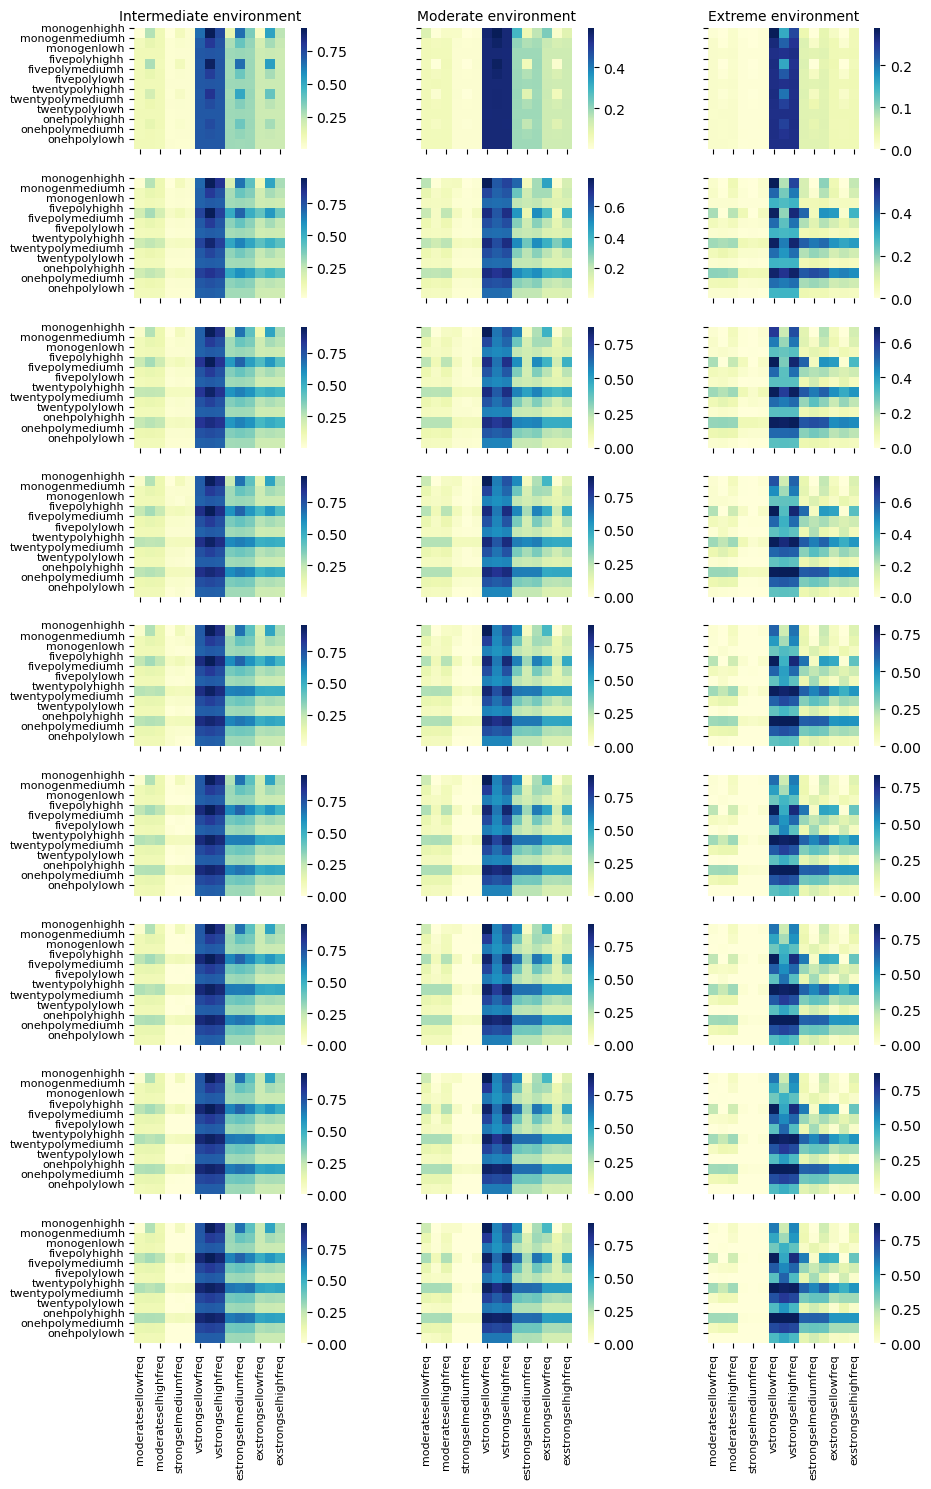

In [44]:

fig, axes = plt.subplots(9, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num in range(9):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):
        mfitness_col = mfitness[['sel_freq', 'poly_h2', 'optima' , str(col_num)]].copy()
        filter1 = mfitness_col[mfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, str(col_num))
        filter1 = filter1.astype(float)
        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True)
        ax.set_ylabel('')
        
        ax.set_yticks(range(len(filter1.index)))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [142]:
calcualte the cahngee!!! mfitness

SyntaxError: invalid syntax (2708147299.py, line 1)

In [ ]:
for i in range(0, 8):
    mfitness[f'delta_mf{i}'] = mfitness[f'{i+1}'] - mfitness[f'{i}']

In [ ]:
deltas = ['delta_mf0', 'delta_mf1','delta_mf2','delta_mf3','delta_mf4','delta_mf5','delta_mf6','delta_mf7']

In [194]:
global_vmin = mfitness[deltas].values.min()
global_vmax = mfitness[deltas].values.max()

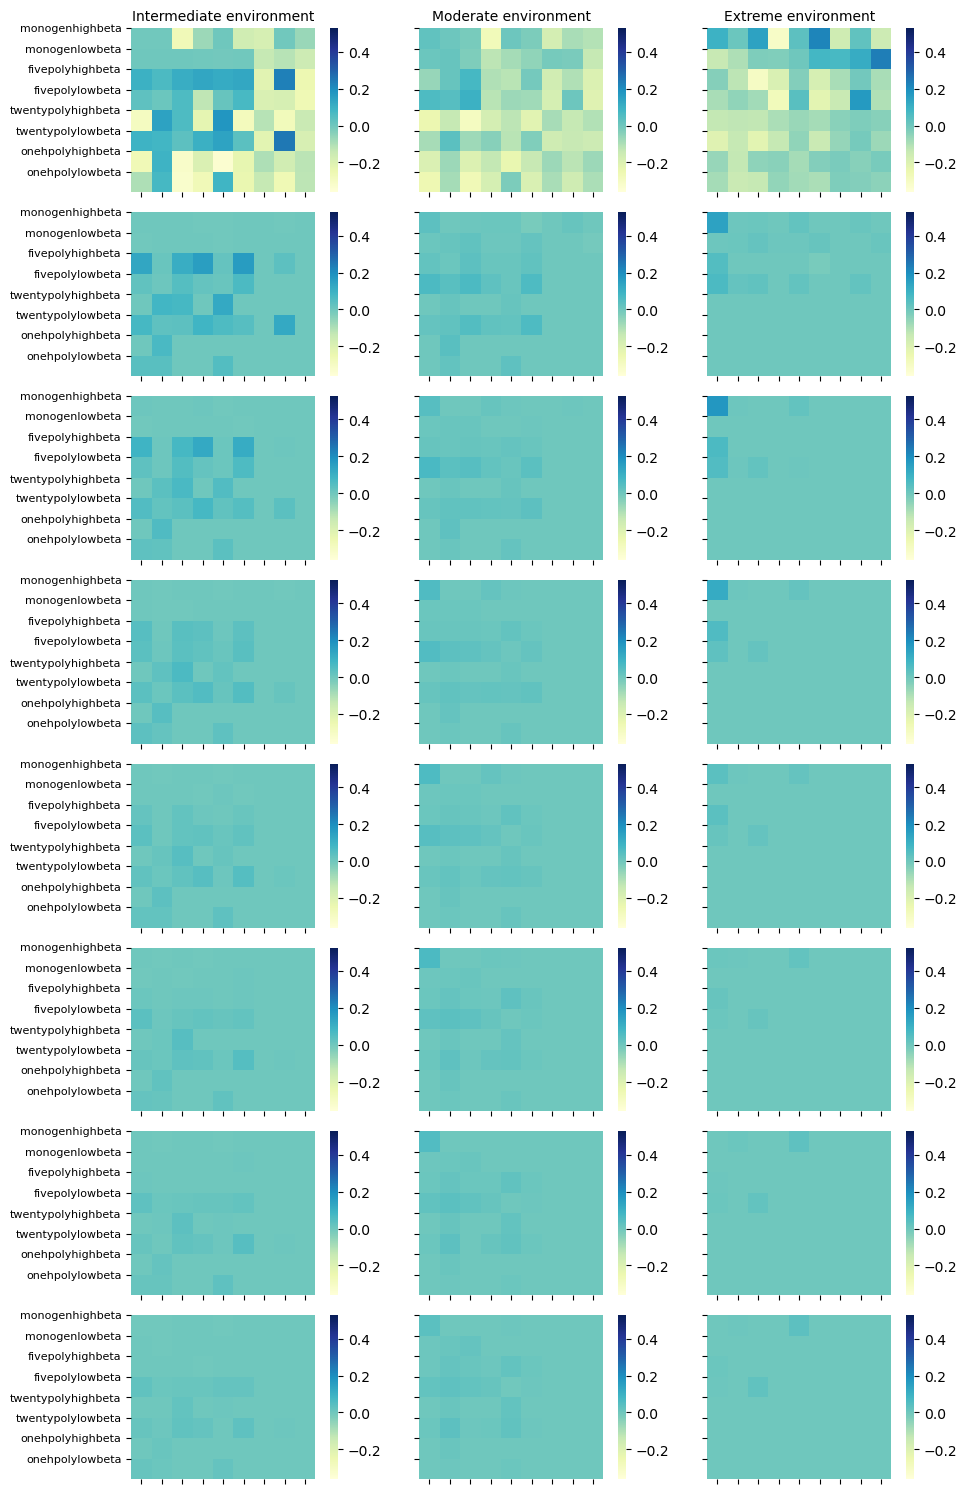

In [195]:
# Assuming mfitness is your DataFrame
# Create a 2x3 grid of subplots for heatmaps (2 rows and 3 columns for 6 subplots)
fig, axes = plt.subplots(8, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num,delta in enumerate(deltas):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):

        mfitness_col = mfitness[['sel_freq', 'poly_beta', 'optima' , delta]].copy()
        filter1 = mfitness_col[mfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, delta)

        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True,
                        vmin=global_vmin, vmax=global_vmax)
        ax.set_ylabel('')
        
        ax.set_yticks(range(8))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Decision tree

In [33]:
survival = pop_size[8].isna().replace({True: 1, False: 0})

In [34]:
survival.name = 'survival'

In [37]:
survival = survival.reset_index()

In [44]:
survival['optima'] = survival['index'].str.split('/').str[-1]

In [45]:
survival['sel'] = survival['index'].str.split('/').str[-2]

In [51]:
survival['freq'] = survival['index'].str.split('_').str[-3]

In [52]:
survival['poly'] = survival['index'].str.split('_').str[-2]

In [53]:
survival['beta'] = survival['index'].str.split('_').str[-1].str.split('/').str[0]

In [58]:
survival = survival.drop('index',axis=1)

In [59]:
## maybe is a good idea to replace optima by extreme, mod and intermediate? 

In [61]:
survival = survival.replace({'optima0': 2, 'optima1': 1, 'optima2': 0, 'optima3': 1, 'optima4': 2})

In [70]:
survival = survival.replace({'lowsel': 0, 'moderatesel': 1, 'strongsel': 2})

In [73]:
survival = survival.replace({'lowfreq': 0, 'mediumfreq': 1, 'highfreq': 2})

In [76]:
survival = survival.replace({'monogen': 1, 'fivepoly': 5, 'twentypoly': 20, 'onehpoly':100})

In [78]:
survival = survival.replace({'highbeta': 1, 'lowbeta': 0})

In [ ]:
sklearn.preprocessing.OneHotEncoder or pandas.get_dummies

In [79]:
survival

,survival,optima,sel,freq,poly,beta
0,1,2,0,2,5,1
1,0,1,0,2,5,1
2,0,0,0,2,5,1
3,0,1,0,2,5,1
4,0,2,0,2,5,1
...,...,...,...,...,...,...
355,1,2,2,1,20,0
356,1,1,2,1,20,0
357,1,0,2,1,20,0
358,1,1,2,1,20,0


In [92]:
X.columns

Index(['optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [80]:
X = survival.drop('survival',axis=1)

In [81]:
Y = survival['survival']

In [82]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [87]:
clf = clf.fit(X, Y)

In [ ]:
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


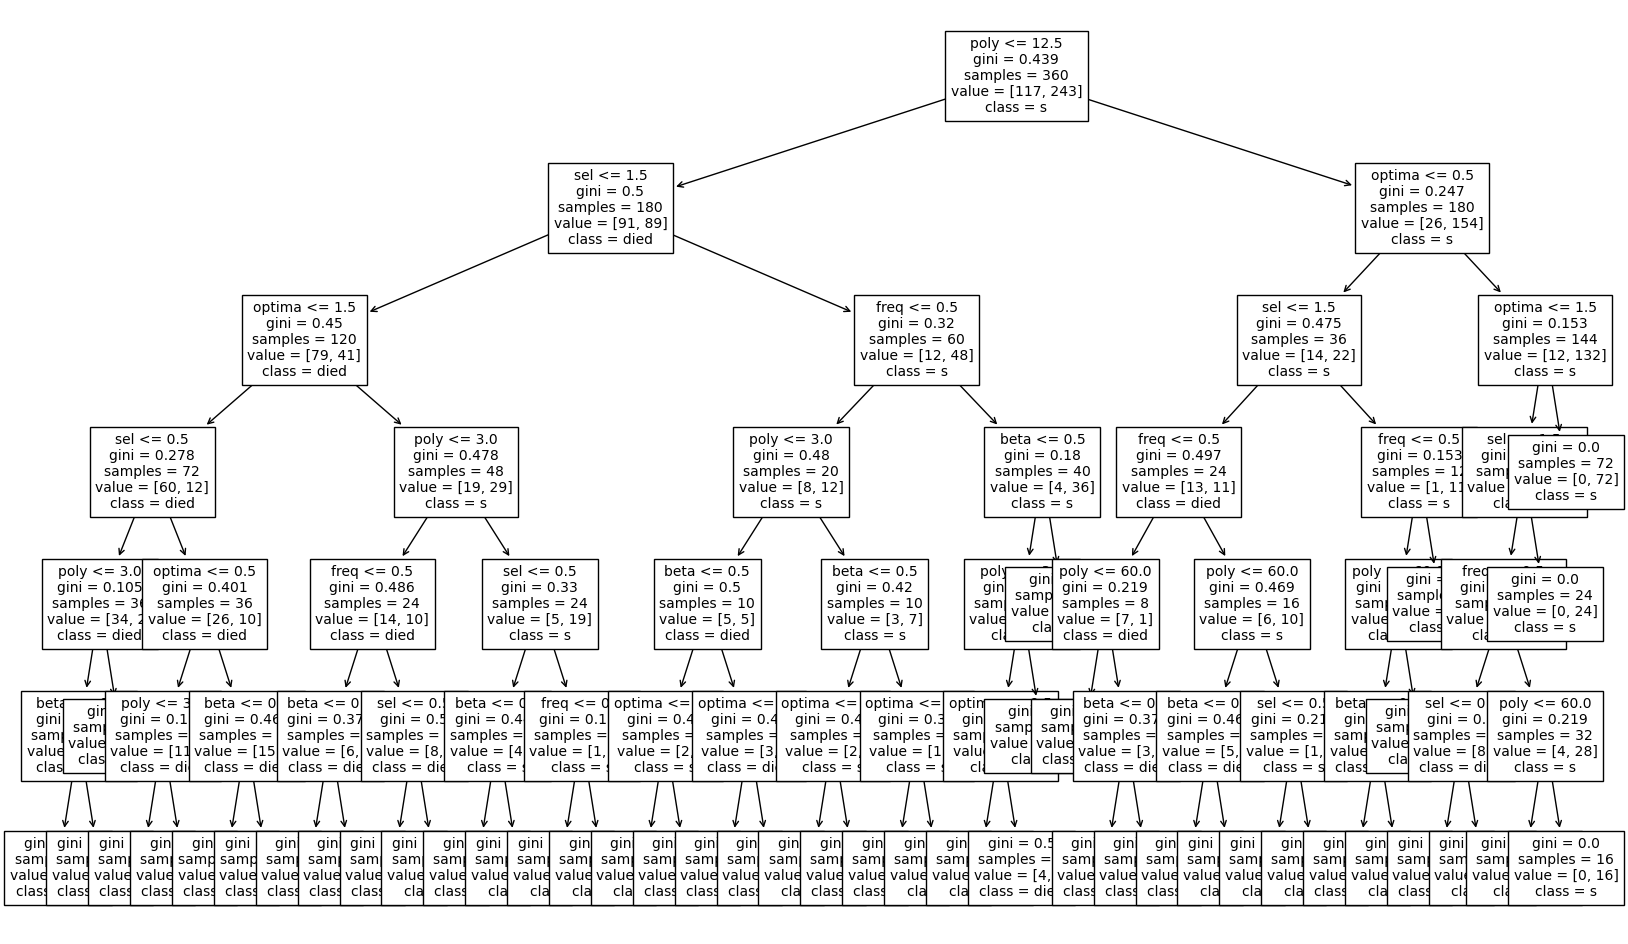

In [96]:

# plot tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X.columns, class_names=['died', 's'])
plt.show()

[Text(0.6247282608695652, 0.95, 'x[3] <= 12.5\ngini = 0.439\nsamples = 360\nvalue = [117, 243]'),
 Text(0.4016304347826087, 0.85, 'x[1] <= 1.5\ngini = 0.5\nsamples = 180\nvalue = [91, 89]'),
 Text(0.21195652173913043, 0.75, 'x[0] <= 1.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.06956521739130435, 0.65, 'x[1] <= 0.5\ngini = 0.278\nsamples = 72\nvalue = [60, 12]'),
 Text(0.02608695652173913, 0.55, 'x[3] <= 3.0\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.017391304347826087, 0.45, 'x[4] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.008695652173913044, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.02608695652173913, 0.35, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.017391304347826087, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.034782608695652174, 0.25, 'x[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02608695652173913, 0.15, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

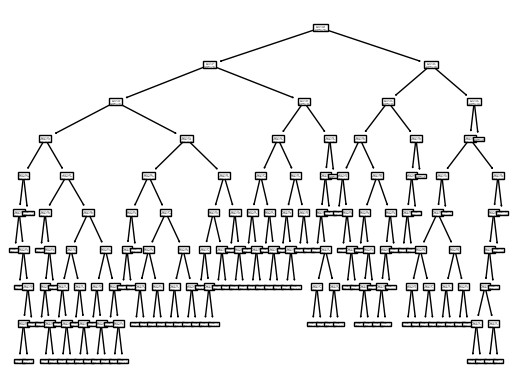

In [85]:
tree.plot_tree(clf);